## Import data

In [91]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [3]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [4]:
df.columns

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P25',
       'Temperature_Bastia_Umbra', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [5]:
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

In [9]:
df.columns
targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [17]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.dtypes
# df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

date                    datetime64[ns]
rainfall                       float64
depth_to_groundwater           float64
temperature                    float64
drainage_volume                float64
river_hydrometry               float64
dtype: object

In [18]:
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


## Check null values

In [36]:
df.isnull().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64

## Visualize

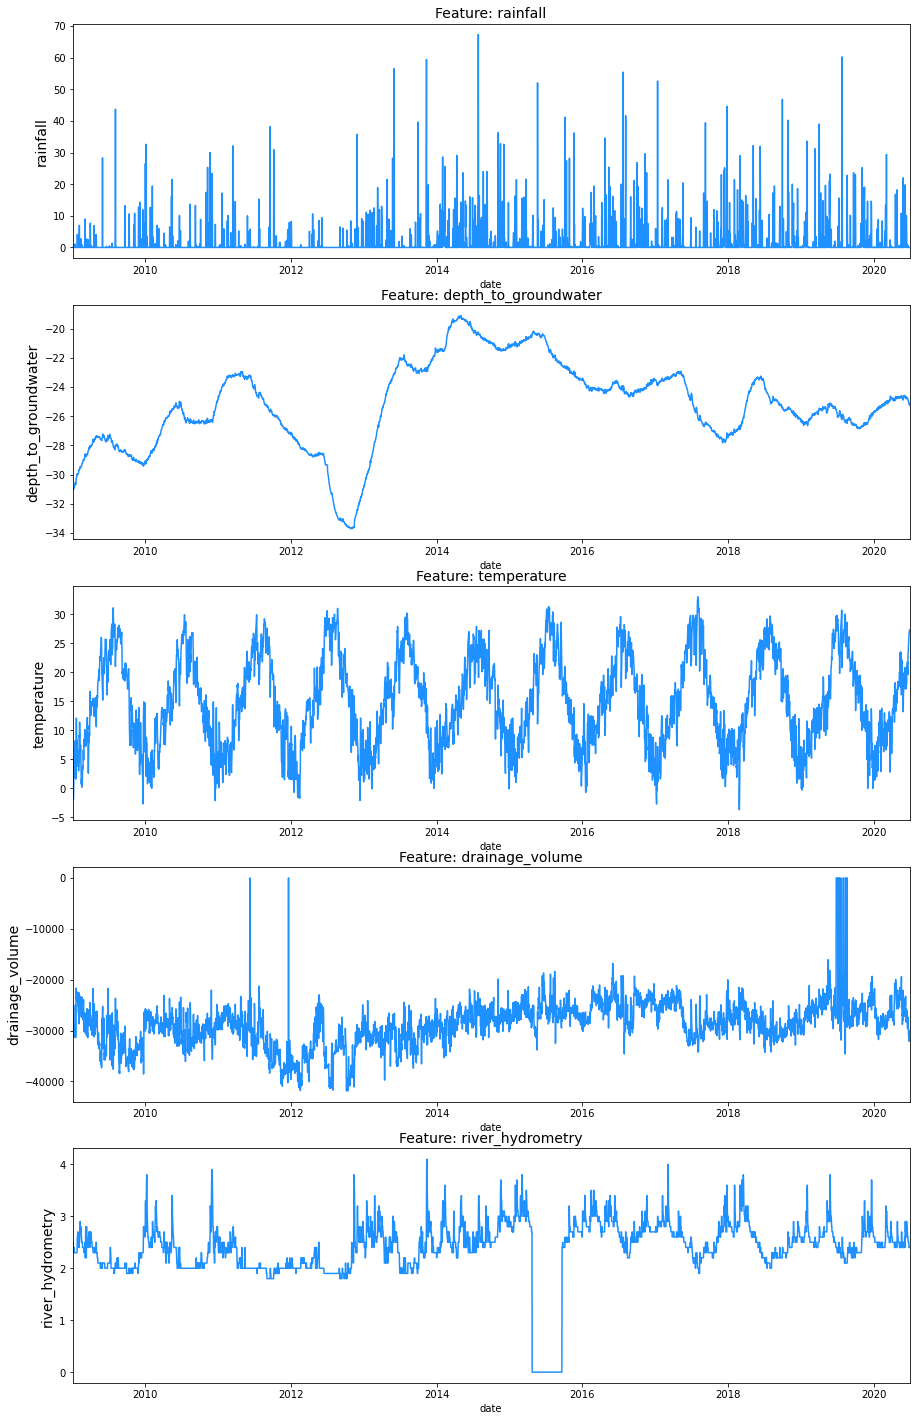

In [34]:
# To compelte the data, as naive method, we will use ffill
from matplotlib import pyplot as plt
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])  

 NA values seems to be represented by 0 for hydrometry anddrainage_volume hence replace these by NA and later cater to missing values

In [40]:
import numpy as np
df['river_hydrometry']=df['river_hydrometry'].replace(0,np.nan)
df['drainage_volume']=df['drainage_volume'].replace(0,np.nan)

In [43]:
df.isnull().sum()

date                      0
rainfall                  0
depth_to_groundwater     27
temperature               0
drainage_volume          26
river_hydrometry        150
dtype: int64

In [46]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

## Post missing imputation and data cleaning

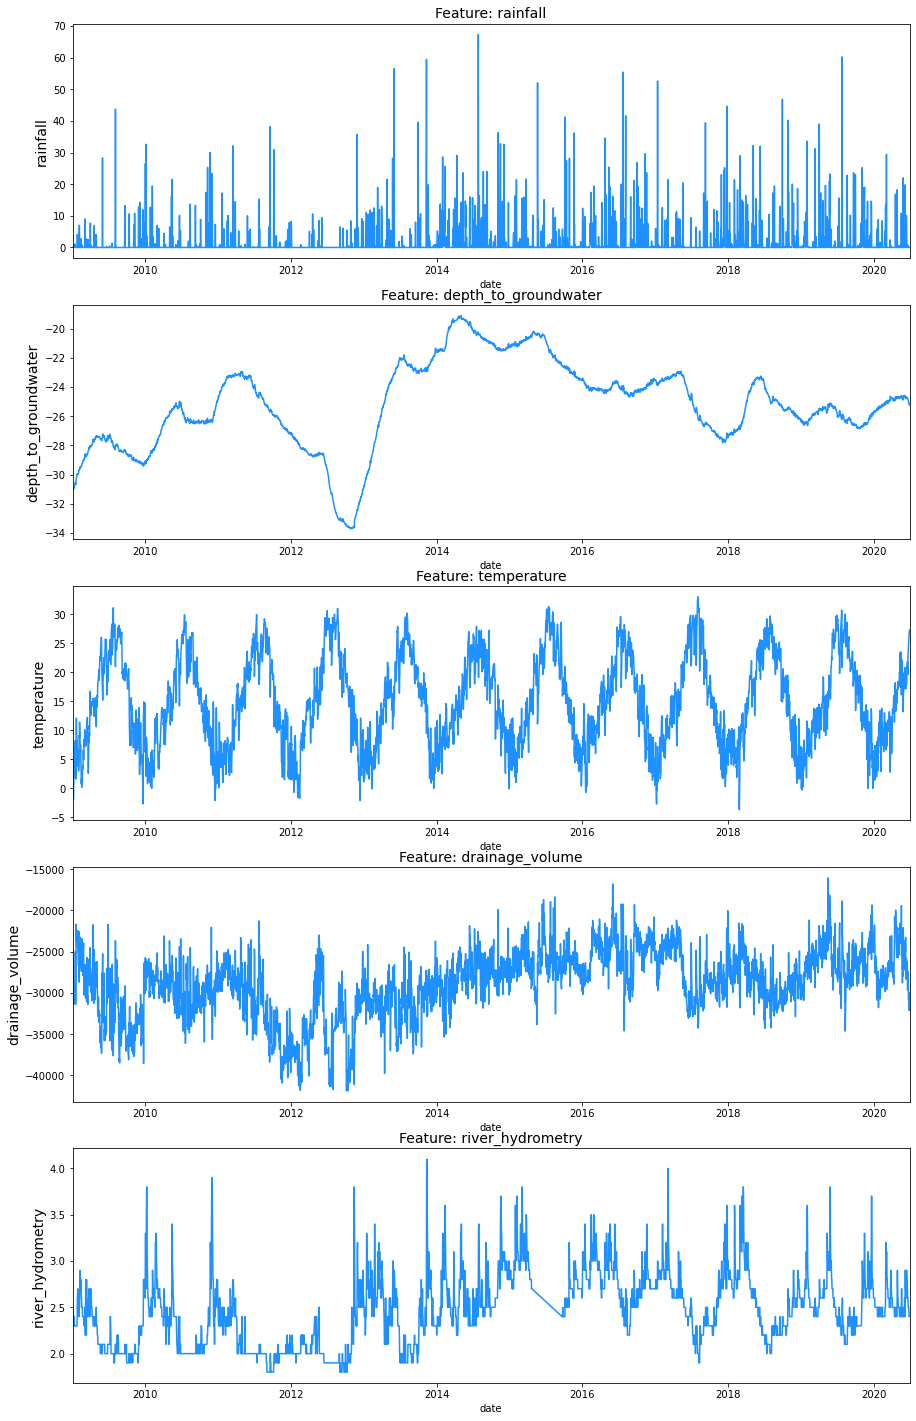

In [47]:
# To compelte the data, as naive method, we will use ffill
from matplotlib import pyplot as plt
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])  

## Resampling

C:\Users\syednajme\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\syednajme\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\syednajme\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\s

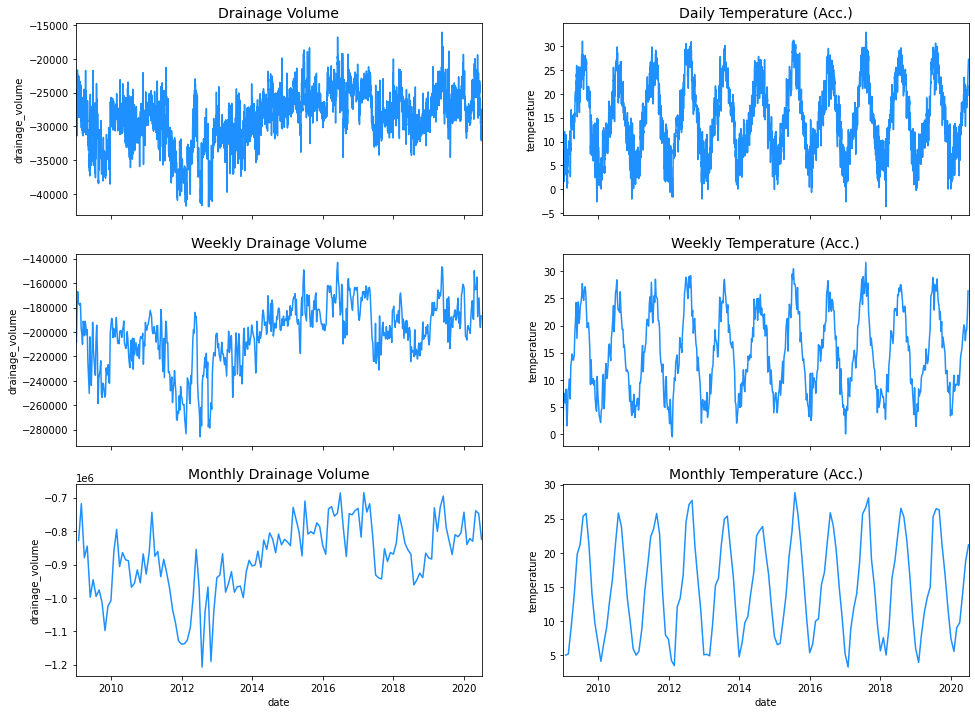

In [52]:
fig, ax =plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(df['date'], df['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(df['date'], df['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['temperature'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['temperature'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

# As we can see, downsample to weekly could smooth the data 

In [53]:

downsample = df[['date',
                 'depth_to_groundwater', 
                 'temperature',
                 'drainage_volume', 
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D', on='date').mean().reset_index(drop=False)

df = downsample.copy()

In [64]:
df.shape

(600, 6)

In [65]:
df.head()

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286


## Check stationarity

In [62]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['depth_to_groundwater'].values)

result

(-2.8802016493166605,
 0.047699190920208856,
 7,
 592,
 {'1%': -3.441444394224128,
  '5%': -2.8664345376276454,
  '10%': -2.569376663737217},
 -734.3154255877625)

In [61]:
print('p value:',result[1])

p value: 0.047699190920208856


In [ ]:
# First Order Differencing
ts_diff = np.diff(df['depth_to_groundwater'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

In [69]:
ts_diff=np.diff(df['depth_to_groundwater'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)
df.head()

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall,depth_to_groundwater_diff_1
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,0.000000
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,0.264286
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,0.364286
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,0.401429
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,0.228571


# Data is stationary

## Feature Engineering

In [90]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

In [92]:
df.head()

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall,depth_to_groundwater_diff_1,year,month,day,day_of_year,week_of_year,quarter,season
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,0.000000,2009,1,1,1,1,1,1
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,0.264286,2009,1,8,8,2,1,1
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,0.364286,2009,1,15,15,3,1,1
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,0.401429,2009,1,22,22,4,1,1
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,0.228571,2009,1,29,29,5,1,1


## Decomposing the values in trend+seasonality+error

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [97]:
df.head()

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall,depth_to_groundwater_diff_1,year,month,day,...,rainfall_trend,rainfall_seasonal,temperature_trend,temperature_seasonal,drainage_volume_trend,drainage_volume_seasonal,river_hydrometry_trend,river_hydrometry_seasonal,depth_to_groundwater_trend,depth_to_groundwater_seasonal
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,0.000000,2009,1,1,...,0.806294,0.688948,15.329959,-9.739920,-32404.467037,1551.335303,2.164913,0.207547,-29.571657,-0.643767
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,0.264286,2009,1,8,...,0.809093,-0.728055,15.312814,-9.838787,-32374.371773,938.070633,2.167252,0.186527,-29.535110,-0.572078
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,0.364286,2009,1,15,...,0.811892,-0.717139,15.295668,-10.002955,-32344.276508,832.934327,2.169592,0.105423,-29.498564,-0.484281
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,0.401429,2009,1,22,...,0.814691,0.493481,15.278522,-9.973161,-32314.181244,518.836188,2.171931,0.131993,-29.462017,-0.417712
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,0.228571,2009,1,29,...,0.817490,-0.556499,15.261377,-10.246938,-32284.085980,238.454010,2.174270,0.152668,-29.425470,-0.362900


In [100]:
df.columns.sort_values

<bound method Index.sort_values of Index(['date', 'depth_to_groundwater', 'temperature', 'drainage_volume',
       'river_hydrometry', 'rainfall', 'depth_to_groundwater_diff_1', 'year',
       'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season',
       'rainfall_trend', 'rainfall_seasonal', 'temperature_trend',
       'temperature_seasonal', 'drainage_volume_trend',
       'drainage_volume_seasonal', 'river_hydrometry_trend',
       'river_hydrometry_seasonal', 'depth_to_groundwater_trend',
       'depth_to_groundwater_seasonal'],
      dtype='object')>

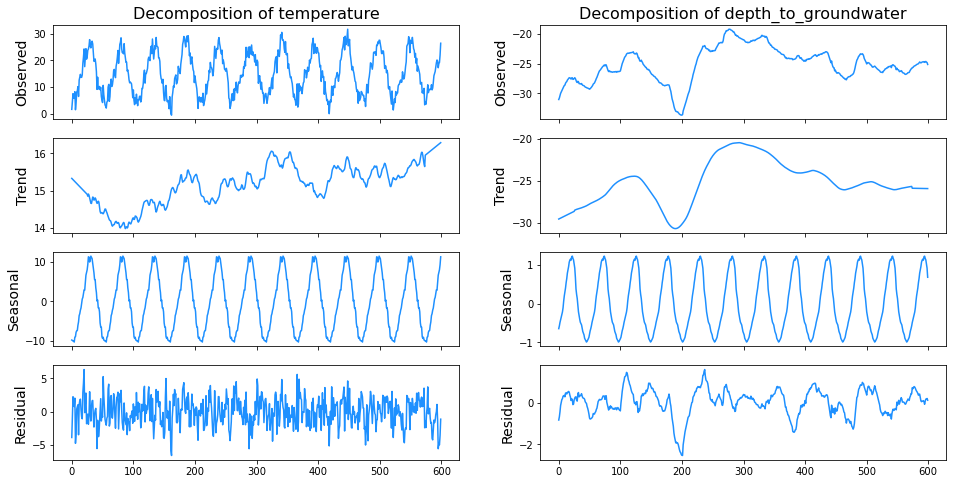

In [98]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['temperature', 'depth_to_groundwater']):
    
    res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

## Check ACF and PACF

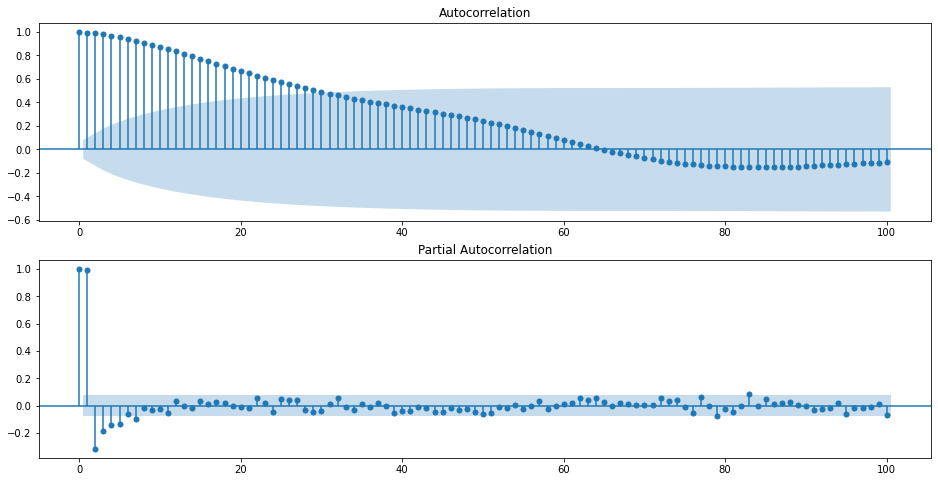

In [101]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['depth_to_groundwater'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater'], lags=100, ax=ax[1])

plt.show()

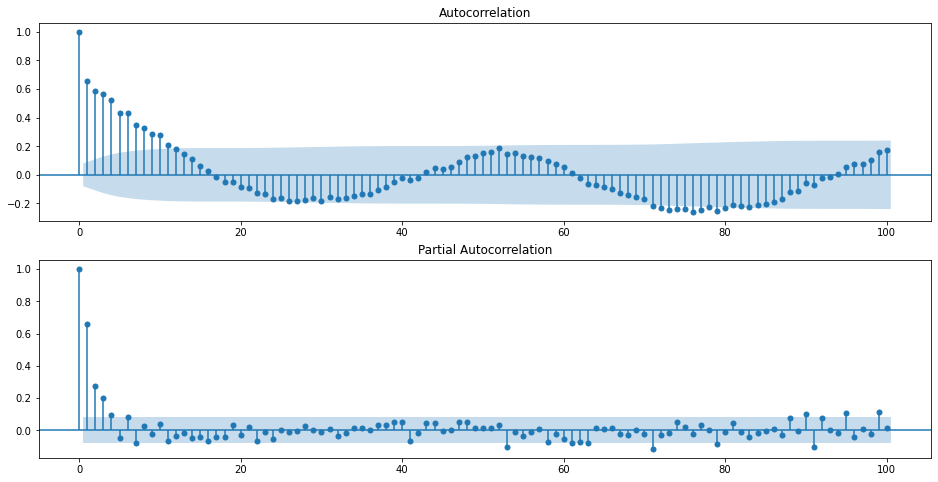

In [104]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])

plt.show()

## ARIMA model

In [189]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

510 90


In [200]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Fit model
model = ARIMA(y_train, order=(2,1,0))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(90)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_mape = mean_absolute_percentage_error(y_valid, y_pred)

print('Vaidation MAPE:',score_mape)
# print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

Vaidation MAPE: 0.018100495010972967


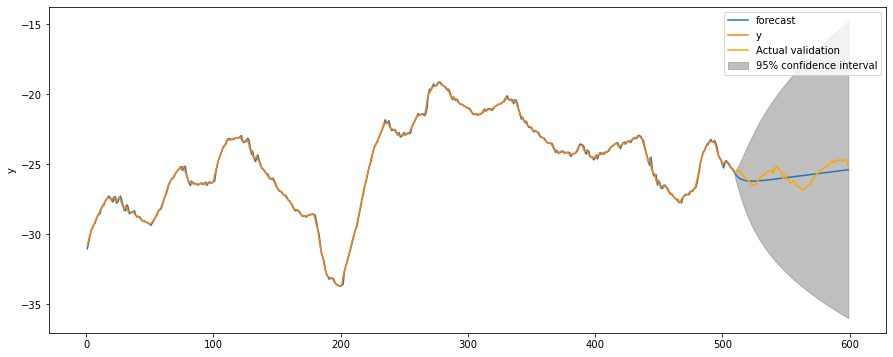

In [197]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1, 599,ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Actual validation') 


plt.show()

## Auto ARIMA

In [152]:
# !pip install pmdarima

In [170]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model1 = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',seasonal=False,trace=True)      
                      

print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-631.136, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-242.692, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-574.047, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-427.347, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-243.054, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-629.209, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-629.237, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-492.779, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-611.065, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-628.350, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-632.995, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-428.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-575.735, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-631.069, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]          

## Auto arima gets 1,1,1

In [201]:
y_pred=model1.predict(90)

# Calcuate metrics

score_mape = mean_absolute_percentage_error(y_valid, y_pred)

print('Vaidation MAPE:',score_mape)


Vaidation MAPE: 0.04729152792166687


<AxesSubplot:ylabel='y'>

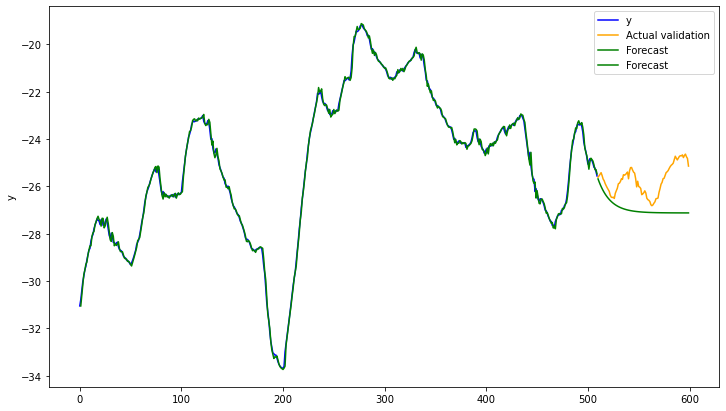

In [227]:
fig,ax = plt.subplots(figsize=(12,7))
#     kws = dict(marker='o')
sns.lineplot(x=x_train.index, y=y_train['y'], ax=ax, color='blue', label='y') 
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Actual validation') 
sns.lineplot(x=x_valid.index, y=model1.predict(90), ax=ax, color='green', label='Forecast') 
sns.lineplot(x=x_train.index[1:], y=model1.predict_in_sample()[1:], ax=ax, color='green', label='Forecast')
# ax.plot(y_train,label='Train')
# ax.plot(y_valid,label='Validation',color='orange')
# ax.plot(model1.predict(590),label='Prediction',ls='--',linewidth=3)

In [207]:
model1.order
model1.seasonal_order

(0, 0, 0, 0)

## LSTM

In [234]:
from sklearn.preprocessing import MinMaxScaler

In [243]:


data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

In [256]:
scaled_data

array([[-8.17966436e-01],
       [-7.99703850e-01],
       [-7.74531096e-01],
       [-7.46791708e-01],
       [-7.30997038e-01],
       [-7.12537019e-01],
       [-7.02369200e-01],
       [-6.84106614e-01],
       [-6.68904245e-01],
       [-6.55281343e-01],
       [-6.50542942e-01],
       [-6.28430405e-01],
       [-6.16386969e-01],
       [-6.09575518e-01],
       [-5.92398815e-01],
       [-5.82724580e-01],
       [-5.72359329e-01],
       [-5.64363277e-01],
       [-5.67917078e-01],
       [-5.70187562e-01],
       [-5.80750247e-01],
       [-5.66238894e-01],
       [-5.65251728e-01],
       [-5.83514314e-01],
       [-5.81836130e-01],
       [-5.73247779e-01],
       [-5.64264561e-01],
       [-5.74629812e-01],
       [-5.92892399e-01],
       [-6.12537019e-01],
       [-6.20138203e-01],
       [-6.05626851e-01],
       [-6.12438302e-01],
       [-6.32675222e-01],
       [-6.32477789e-01],
       [-6.37216190e-01],
       [-6.36031589e-01],
       [-6.31885489e-01],
       [-6.4

<AxesSubplot:ylabel='Count'>

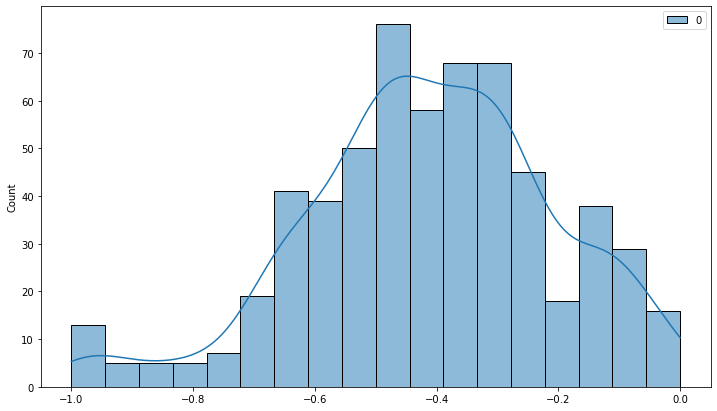

In [247]:
fig,ax = plt.subplots(figsize=(12,7))
sns.histplot(data=scaled_data,ax=ax,kde=True)

In [264]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

406 90


In [272]:
x_train.shape

(406, 1, 52)

In [273]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [274]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
406/406 [==============================] - 4s 4ms/step - loss: 0.0134 - val_loss: 0.0013
Epoch 2/5
406/406 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 8.9958e-04
Epoch 3/5
406/406 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 4/5
406/406 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 3.8797e-04
Epoch 5/5
406/406 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 8.6101e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            92672     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
           

In [281]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


# invert scaled predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [287]:
len((y_test)[0])

90

In [288]:

# Calcuate metrics

score_mape = mean_absolute_percentage_error(y_test[0], test_predict)

print('Vaidation MAPE:',score_mape)


Vaidation MAPE: 0.013634624953247357


In [295]:
univariate_df

,ds,y
0,2009-01-01,-31.048571
1,2009-01-08,-30.784286
2,2009-01-15,-30.420000
3,2009-01-22,-30.018571
4,2009-01-29,-29.790000
...,...,...
595,2020-05-28,-24.697143
596,2020-06-04,-24.638571
597,2020-06-11,-24.751429
598,2020-06-18,-24.822857


In [302]:
len(train_predict)

406

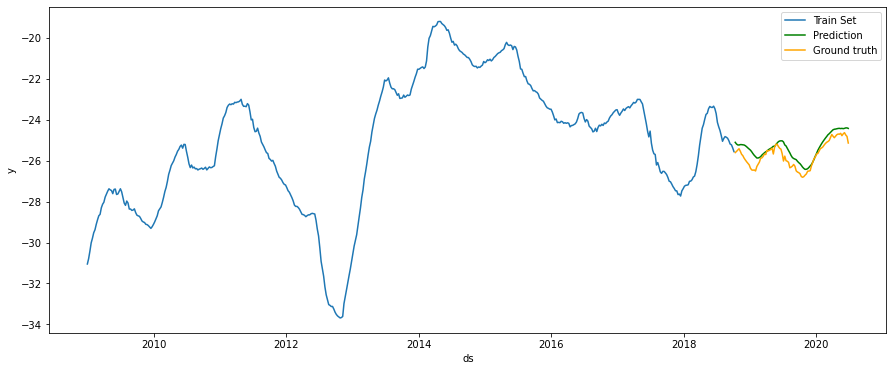

In [304]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

plt.show()

## LSTM  gives best results and jence can be used as final model